In [16]:
# batch changing file name
import json
import numpy as np

gama = 0.4
p = 1.0
keepN = 1

for beta in np.arange(0.004,0.404,0.004):

    inpath = r"F:\simulationDATA\RandomNetwork_VaryS\SIS\beta_%s_gama_%s_p_%s_Average_test1000.json" \
                                   % (beta, gama, p)
    outpath = r"C:\Users\CAN_LC\Desktop\data\beta_%s_gama_%s_p_%s_keepN_%s_Average_test100.json" \
                                   % (beta, gama, p, keepN)
    content = json.load(open(inpath))    

    with open(outpath, 'w') as netFile:
                netFile.write(json.dumps(content))
        
print "done!"

done!


In [37]:
# image convert
from PIL import Image
# import os
inpath = r'C:\Users\CAN_LC\Desktop\HT09\FIG\test.png'
outpath = r'C:\Users\CAN_LC\Desktop\HT09\FIG\test.jpg'

try:
    Image.open(inpath).save(outpath)
    print "successful converted!"
except:
    print "error!"

successful converted!


In [36]:
import PIL

inpath = r'C:\Users\CAN_LC\Desktop\HT09\FIG\test.png'
outpath = r'C:\Users\CAN_LC\Desktop\HT09\FIG\test.eps'
img = Image.open(inpath)
PIL.Image.Image.save(img, outpath,"EPSC")


KeyError: 'EPSC'

In [15]:
import numpy as np
import networkx as nx
M = [[1,1],[1,4]]
M = np.array(M)

if M.sum() != 1.0:
    M=M/float(M.sum())
nx,ny=M.shape # nx=ny
x=np.arange(nx)
y=np.arange(ny)
a=M.sum(axis=0)

b=M.sum(axis=1)
print b
vara=(a*x**2).sum()-((a*x).sum())**2
varb=(b*x**2).sum()-((b*x).sum())**2
xy=np.outer(x,y)
ab=np.outer(a,b)
a=(xy*(M-ab)).sum()/np.sqrt(vara*varb)

print a

[ 0.28571429  0.71428571]
0.3


In [16]:
x = range(7)
y = range(4)
print np.outer(x,y)

[[ 0  0  0  0]
 [ 0  1  2  3]
 [ 0  2  4  6]
 [ 0  3  6  9]
 [ 0  4  8 12]
 [ 0  5 10 15]
 [ 0  6 12 18]]


In [5]:
import json
import numpy as np

inpath = r"I:\NEW\ER_NEW"
outpath = r"I:\NEW\ER_NEW_CHANGEINDEX"

gama = 0.4
p = 0.2
simulationT = 100

for keepN in range(1,11):
    for beta in np.arange(0.004,0.404,0.004):
        data = json.load(open(inpath + "\\beta_%s_gama_%s_p_%s_KeepN_%s_Average_test%s.json" \
                                                          % (beta, gama, p, keepN, simulationT)))
        outfilePATH = outpath + "\\beta_%s_gama_%s_p_%s_keepN_%s_Average_test%s.json" \
                                                          % (beta, gama, p, keepN, simulationT)
        with open(outfilePATH,'w') as json_file:
            json_file.write(json.dumps(data))
    print "done!"
        

done!
done!
done!
done!
done!
done!
done!
done!
done!
done!


Inital Network has 5178 nodes
Inital Network has 86276 edges
delete nodeset 0, done!
delete nodeset 1, done!
delete nodeset 2, done!
delete nodeset 3, done!
delete nodeset 4, done!
delete nodeset 5, done!
delete nodeset 6, done!
delete nodeset 7, done!
delete nodeset 8, done!
delete nodeset 9, done!
delete nodeset 10, done!
delete nodeset 11, done!
delete nodeset 12, done!
delete nodeset 13, done!
delete nodeset 14, done!
delete nodeset 15, done!
delete nodeset 16, done!
delete nodeset 17, done!
delete nodeset 18, done!
delete nodeset 19, done!
delete nodeset 20, done!
delete nodeset 21, done!
delete nodeset 22, done!
delete nodeset 23, done!
delete nodeset 24, done!
delete nodeset 25, done!
delete nodeset 26, done!
delete nodeset 27, done!
delete nodeset 28, done!
delete nodeset 29, done!
delete nodeset 30, done!
delete nodeset 31, done!
delete nodeset 32, done!
delete nodeset 33, done!
delete nodeset 34, done!
delete nodeset 35, done!
delete nodeset 36, done!
delete nodeset 37, done!

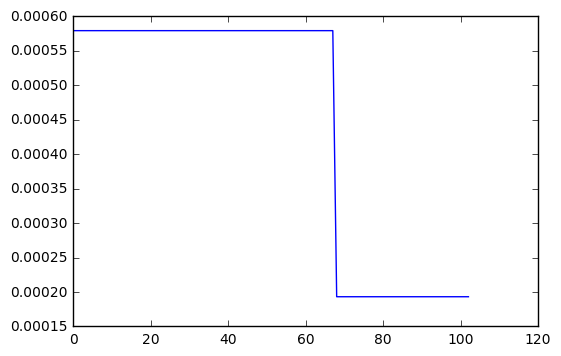

Running time: 1.59266362572 Seconds; 0.026544393762 Minutes


In [37]:
# -*- coding: utf-8 -*-
import time
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
#----------start to count time-------------------
beginTime =time.clock()

datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\5.csv"

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

# Construct initial graph 
G = nx.empty_graph()
for i in range(len(source)):
    G.add_edge(source[i],target[i])

print "Inital Network has %s nodes" % len(G.nodes())
print "Inital Network has %s edges" % len(G.edges())

length = len(G)
deleteSize = 50
# iterGraph = G
ratioList = []
for k in range(length/deleteSize):
    # centrality index
#     print "Network has %s nodes" % len(G.nodes())
#     print "Network has %s edges" % len(G.edges())
    dcDict = nx.degree_centrality(G)  # get nodes' degree centrality index 
    tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
    nodeList = []
    for j in range(len(tempList)):
        temp = tempList[j][0]
        nodeList.append(temp)
    
    rList = nodeList[:deleteSize] # delete the first 500 nodes in row
    G.remove_nodes_from(rList)
    
    largest_cc = max(nx.connected_components(G))    # get the maximum component size
    ratio = len(largest_cc)/float(length)
    ratioList.append(ratio)
    print "delete nodeset %s, done!"%k

# calculate network robustness index
R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

plt.plot(ratioList)
plt.show()

#------------counting running time-----------------       
endTime = time.clock()
print('Running time: %s Seconds; %s Minutes'%(endTime-beginTime,(endTime-beginTime)/60))  

Inital Network has 5178 nodes
Inital Network has 86276 edges
delete nodeset 0, done!
delete nodeset 1, done!
delete nodeset 2, done!
delete nodeset 3, done!
delete nodeset 4, done!
delete nodeset 5, done!
delete nodeset 6, done!
delete nodeset 7, done!
delete nodeset 8, done!
delete nodeset 9, done!
delete nodeset 10, done!
delete nodeset 11, done!
delete nodeset 12, done!
delete nodeset 13, done!
delete nodeset 14, done!
delete nodeset 15, done!
delete nodeset 16, done!
delete nodeset 17, done!
delete nodeset 18, done!
delete nodeset 19, done!
delete nodeset 20, done!
delete nodeset 21, done!
delete nodeset 22, done!
delete nodeset 23, done!
delete nodeset 24, done!
delete nodeset 25, done!
delete nodeset 26, done!
delete nodeset 27, done!
delete nodeset 28, done!
delete nodeset 29, done!
delete nodeset 30, done!
delete nodeset 31, done!
delete nodeset 32, done!
delete nodeset 33, done!
delete nodeset 34, done!
delete nodeset 35, done!
delete nodeset 36, done!
delete nodeset 37, done!

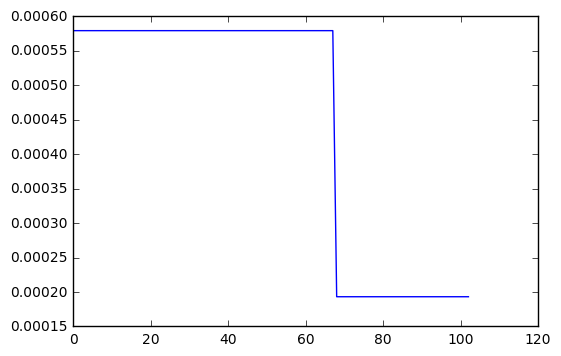

Running time: 2.04289767612 Seconds; 0.034048294602 Minutes


In [38]:
# -*- coding: utf-8 -*-
import time
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
#----------start to count time-------------------
beginTime =time.clock()

datapath = r"C:\Users\CAN_LC\Desktop\Datacastle\networks\5.csv"

df = pd.read_csv(datapath, header = None)
source = list(df[0])
target = list(df[1])

# Construct initial graph 
G = nx.empty_graph()
for i in range(len(source)):
    G.add_edge(source[i],target[i])

print "Inital Network has %s nodes" % len(G.nodes())
print "Inital Network has %s edges" % len(G.edges())

length = len(G)
deleteSize = 50
nodeSeries = []
ratioList = []

for k in range(deleteSize):
    # centrality index
    dcDict = nx.degree_centrality(G)  # get nodes' degree centrality index 
    tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
    nodeList = []
    for j in range(len(tempList)):
        temp = tempList[j][0]
        nodeList.append(temp)
        
    rList = nodeList[:1] # delete the first nodes in row, repeat 20 times to obtain the first nodes set
    G.remove_nodes_from(rList)
    nodeSeries += rList

largest_cc = max(nx.connected_components(G))    # get the maximum component size
ratio = len(largest_cc)/float(length)
ratioList.append(ratio)
print "delete nodeset 0, done!"

for k in range(length/deleteSize-1):
    # centrality index
    dcDict = nx.degree_centrality(G)  # get nodes' degree centrality index 
    tempList = sorted(dcDict.iteritems(), key = lambda getNode:getNode[1], reverse = True)
    nodeList = []
    for j in range(len(tempList)):
        temp = tempList[j][0]
        nodeList.append(temp)
    
    rList = nodeList[:deleteSize] # delete the first 500 nodes in row
    G.remove_nodes_from(rList)
    nodeSeries += rList
# print nodeSeries # sorted nodes list
    largest_cc = max(nx.connected_components(G))    # get the maximum component size
    ratio = len(largest_cc)/float(length)
    ratioList.append(ratio)
    print "delete nodeset %s, done!"%(k+1)

# calculate network robustness index
R = sum(ratioList)/len(ratioList)
print "Robustness is:",R

plt.plot(ratioList)
plt.show()

#------------counting running time-----------------       
endTime = time.clock()
print('Running time: %s Seconds; %s Minutes'%(endTime-beginTime,(endTime-beginTime)/60))  

[900, 300, 600, 750, 900, 900, 1350, 750, 750, 600, 450, 750, 900, 750, 900, 750, 750, 300, 600, 450]
[u'midnightblue', u'peachpuff', u'darkseagreen', u'lawngreen', u'yellowgreen', u'bisque', u'sage', u'lightyellow', u'forestgreen', u'moccasin', u'violet', u'darkmagenta', u'mistyrose', u'lightpink', u'white', u'mediumseagreen', u'orange', u'mediumslateblue', u'blueviolet', u'aqua']


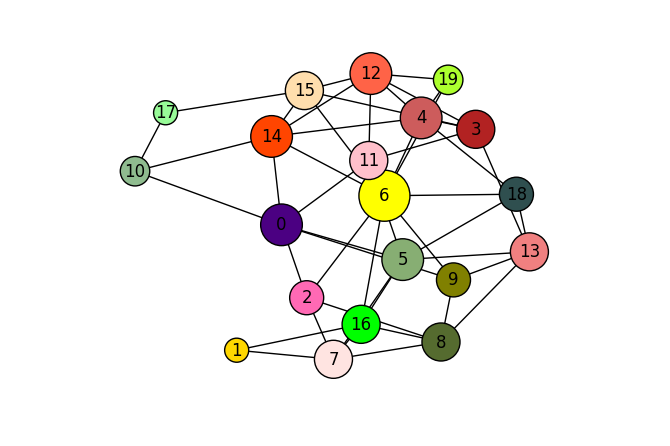

In [2]:
import six
from matplotlib import colors
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

N = 20
nodeList = range(N)

G = nx.random_graphs.fast_gnp_random_graph(N,0.2)
size = list(np.array(list(G.degree(nodeList).values()))*150)
print size

colorsList = list(six.iteritems(colors.cnames))
colors = []
for i in colorsList:
    colors.append(i[0])
# print colors
color = random.sample(colors,len(size))
print color
nx.draw(G,pos=nx.spring_layout(G), node_color = colors, node_size = size, with_labels = True)
plt.show()

linkList is [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
inactiveNodes is [0, 2, 1]
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 2)
(1, 2)
(2, 3)
(2, 4)
(2, 5)
(0, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
remainlinkList is [(3, 4), (3, 5), (4, 5)]


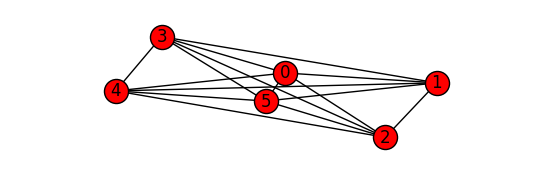

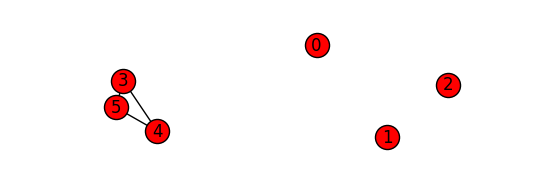

In [18]:
N = 6

node_durationDict = {}
link_durationDict = {}

nodeList = range(N)    # all possible active nodes
G0 = nx.complete_graph(N)
linkList = G0.edges()  # all possible active links
print 'linkList is',linkList

fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(211)
# color = random.sample(colors,len(size))
# size = list((np.array(list(G0.degree(nodeList).values()))+1)*70)
nx.draw(G0,pos=nx.spring_layout(G0), with_labels = True)  # spectral_layout
# nx.draw(G0,pos=nx.spring_layout(G0), node_color = colors, node_size = size, with_labels = True)


inactiveNodes = random.sample(nodeList,N/2)
print 'inactiveNodes is',inactiveNodes
# ebunch = itertools.combinations(inactiveNodes,2)
for i in inactiveNodes:
    for link in linkList:
        if i in link:
            print link
            
            
#     for j in nodeList:
#         if G0.has_edge(i,j):
#             G0.remove_edge(i,j)

remainlinkList = G0.edges()
print 'remainlinkList is',remainlinkList

fig = plt.figure(figsize=(6,4))
ax2 = plt.subplot(212)


# color = random.sample(colors,len(size))
# size = list((np.array(list(G0.degree(nodeList).values()))+2)*90)
nx.draw(G0,pos=nx.spring_layout(G0),with_labels = True)
# nx.draw(G0,pos=nx.spring_layout(G0), node_color = colors, node_size = size, with_labels = True)
plt.show()

{(6, 9): 0, (10, 17): 0, (7, 12): 0, (1, 17): 0, (0, 7): 0, (13, 17): 0, (14, 17): 0, (1, 6): 0, (0, 10): 0, (3, 7): 0, (2, 5): 0, (1, 11): 0, (5, 8): 0, (6, 7): 0, (4, 19): 0, (6, 10): 0, (5, 18): 0, (10, 18): 0, (0, 17): 0, (7, 19): 0, (12, 17): 0, (0, 4): 0, (8, 15): 0, (4, 10): 0, (2, 6): 0, (9, 14): 0, (15, 18): 0, (5, 11): 0, (4, 5): 0, (10, 13): 0, (4, 16): 0, (9, 16): 0, (14, 15): 0, (16, 19): 0, (17, 18): 0, (2, 17): 0, (14, 16): 0, (0, 1): 0, (3, 12): 0, (1, 12): 0, (8, 12): 0, (4, 15): 0, (2, 11): 0, (5, 14): 0, (14, 18): 0, (3, 18): 0, (10, 14): 0, (8, 18): 0, (6, 13): 0, (11, 15): 0, (9, 19): 0, (7, 8): 0, (6, 16): 0, (11, 16): 0, (2, 18): 0, (0, 14): 0, (3, 11): 0, (1, 15): 0, (8, 9): 0, (4, 12): 0, (2, 12): 0, (15, 19): 0, (3, 17): 0, (6, 14): 0, (7, 15): 0, (12, 13): 0, (1, 16): 0, (13, 16): 0, (1, 5): 0, (0, 11): 0, (3, 6): 0, (1, 10): 0, (6, 11): 0, (5, 17): 0, (10, 19): 0, (0, 18): 0, (7, 18): 0, (12, 18): 0, (1, 19): 0, (0, 5): 0, (13, 19): 0, (0, 8): 0, (4, 11): 0,

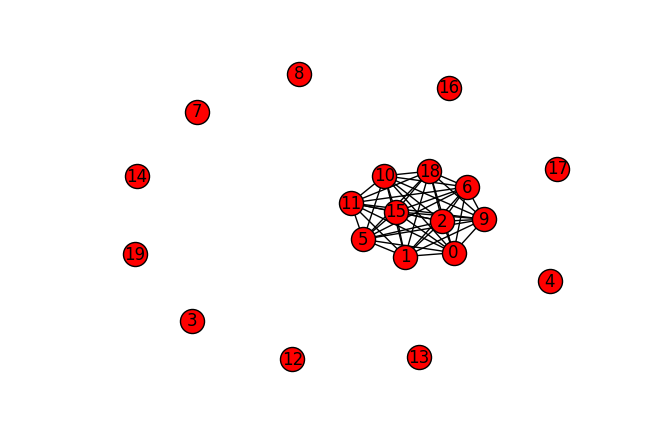

In [15]:
N=20
G0 = nx.complete_graph(N)
nodeList = G0.nodes()
linkList = G0.edges()   # all possible active links
link_durationDict = {}.fromkeys(linkList,0)
print link_durationDict

# Gtemp = G0
for ti in range(5):
    inactiveNode = random.sample(nodeList,N/2)
    Gtemp = nx.complete_graph(N)
#     print 'Gtemp.edges',Gtemp.edges()
    for i in inactiveNode:
        for link in linkList:
            if i in link:
                link_durationDict[link] = 0
        for j in nodeList:
            if Gtemp.has_edge(i,j):
                Gtemp.remove_edge(i,j)
#     print 'Gtemp.edges',Gtemp.edges()
    activeLink = []
    # inactiveLink = []
    for j in Gtemp.edges():
        y = (1 + link_durationDict[j])**(-0.01)
    #         print 'prob is',cl * y * dt
        if random.random() < y :
            link_durationDict[j] += 1
            activeLink.append(j)
        else:
#             linkDurationList.append(link_durationDict[j])
            link_durationDict[j] = 0    
    
    
    print 'acitve link :\n\n', activeLink
    print 'acitve link ratio:\n\n',len(activeLink)/float(len(linkList))
            

print link_durationDict
nx.draw(Gtemp,pos=nx.spring_layout(Gtemp),with_labels = True)
plt.show()

In [7]:
import networkx as nx
import pandas as pd
for i in range(3540):
    try:
        datapath = r"C:\Users\CAN_LC\Desktop\HT09\1_minute\%s.csv"%i
        contact = pd.read_csv(datapath, header = None)
        time = set(list(contact[2]))
    except:
        continue


EmptyDataError: No columns to parse from file